In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
drug_file = "mouse_drug_data.csv"
trial_file = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug = pd.read_csv(drug_file)
trial = pd.read_csv(trial_file)

# Combine the data into a single dataset
drug_trial = pd.merge(drug, trial, on = "Mouse ID", how = "outer")

# Display the data table for preview
drug_trial.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [123]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_avg = drug_trial.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" : "mean"})

# Convert to DataFrame
tumor_avg = tumor_avg.reset_index()

# Preview DataFrame
tumor_avg.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = drug_trial.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" : "sem"})

# Convert to DataFrame
tumor_sem = tumor_sem.reset_index()

# Preview DataFrame
tumor_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [109]:
# Minor Data Munging to Re-Format the Data Frames
tumor = tumor_avg.pivot_table(tumor_avg, index = "Timepoint", columns = "Drug")
tumor.columns = tumor.columns.droplevel()
tsem = tumor_sem.pivot_table(tumor_sem, index = "Timepoint", columns = "Drug")
tsem.columns = tsem.columns.droplevel()
# Preview that Reformatting worked
tumor.head(10)
# tsem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


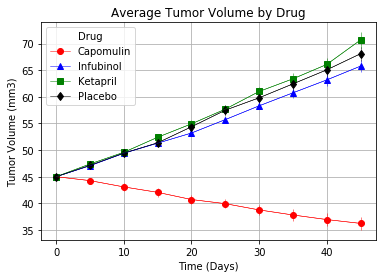

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate the Plot (with Error Bars)
ax = tumor[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(linewidth = .5, yerr = tsem, color = ["r", "b", "g", "k"], legend = False)
ax.set_prop_cycle(None)
tumor[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(linewidth = .5, style =["ro-", "b^-", "gs-", "kd-"], ax = ax)

plt.grid()
plt.title("Average Tumor Volume by Drug")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the Figure
plt.show()

# Save the Figure
plt.savefig("tumor.png")

## Metastatic Response to Treatment

In [30]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_avg = drug_trial.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites" : "mean"})

# Convert to DataFrame
met_avg = met_avg.reset_index()

# Preview DataFrame
met_avg.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [31]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = drug_trial.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites" : "sem"})

# Convert to DataFrame
met_sem = met_sem.reset_index()

# Preview DataFrame
met_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [33]:
# Minor Data Munging to Re-Format the Data Frames
met = met_avg.pivot_table(met_avg, index = "Timepoint", columns = "Drug")
met.columns = met.columns.droplevel()
msem = met_sem.pivot_table(met_sem, index = "Timepoint", columns = "Drug")
msem.columns = msem.columns.droplevel()

# Preview that Reformatting worked
met.head()
msem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


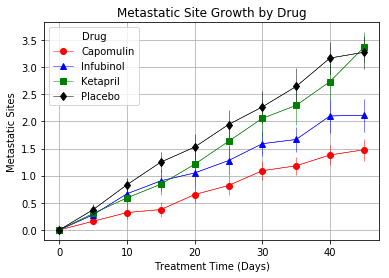

<Figure size 432x288 with 0 Axes>

In [37]:
# Generate the Plot (with Error Bars)
ax = met[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(linewidth = .5, yerr = msem, color = ["r", "b", "g", "k"], legend = False)
ax.set_prop_cycle(None)
met[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(linewidth = .5, style =["ro-", "b^-", "gs-", "kd-"], ax = ax)

plt.grid()
plt.title("Metastatic Site Growth by Drug")
plt.xlabel("Treatment Time (Days)")
plt.ylabel("Metastatic Sites")

# Show the Figure
plt.show()

# Save the Figure
plt.savefig("metastatic_sites.png")

## Survival Rates

In [87]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = drug_trial.groupby(["Drug", "Timepoint"]).agg({"Mouse ID" : "count"})

mice_count["Mouse ID"] = (mice_count["Mouse ID"]/25)*100

# Convert to DataFrame
mice_count = mice_count.reset_index()

# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [106]:
# Minor Data Munging to Re-Format the Data Frames
mice = mice_count.pivot_table(mice_count, index = "Timepoint", columns = "Drug")
mice.columns = mice.columns.droplevel()

# Preview the Data Frame
mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


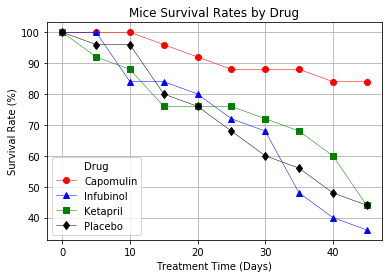

<Figure size 432x288 with 0 Axes>

In [89]:
# Generate the Plot (Accounting for percentages)
mice[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(linewidth = .5, style =["ro-", "b^-", "gs-", "kd-"])

plt.grid()
plt.title("Mice Survival Rates by Drug")
plt.xlabel("Treatment Time (Days)")
plt.ylabel("Survival Rate (%)")

# Show the Figure
plt.show()

# Save the Figure
plt.savefig("mice_survival.png")

## Summary Bar Graph

In [175]:
# Calculate the percent changes for each drug
tumor_diff = tumor.agg(["max", "min"])
tumor_diff
# tumor_pct = tumor_diff.diff(periods = -1)
# tumor_pct
# Display the data to confirm

# print(tumor.diff(periods=-9).iloc[0])


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
max,45.000000,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,45.000000,68.43831,65.960888
min,36.236114,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,34.955595,45.00000,45.000000


In [ ]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

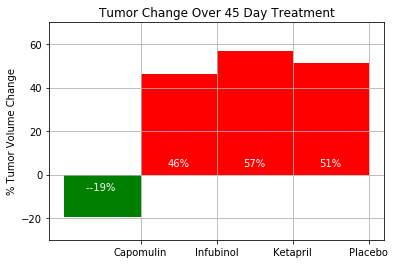